# **Email Spam Detection** 📩

---



# **Import Library**

In [3]:
# Importing all the libraries to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from wordcloud import WordCloud
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from collections import Counter


# **Load Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

In [5]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# **EDA**

## **Cleaning Data**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


##**Remove the last 3 unnecessary columns**

In [7]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.sample(5)

,v1,v2
1682,ham,HI BABE U R MOST LIKELY TO BE IN BED BUT IM SO...
5289,ham,Hey! Congrats 2u2. id luv 2 but ive had 2 go h...
903,ham,Lovely smell on this bus and it ain't tobacco...
1365,spam,HOT LIVE FANTASIES call now 08707509020 Just 2...
3900,ham,That depends. How would you like to be treated...


## **Rename Columns**

In [8]:
df.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)
df.head()


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [11]:
df.duplicated().sum()

403

In [12]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

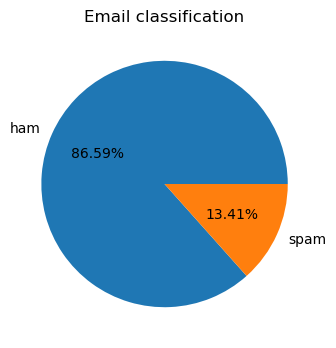

In [13]:
plt.figure(figsize=(4, 4))
plt.pie(df['label'].value_counts(), labels=['ham','spam'], autopct='%1.2f%%')
plt.title('Email classification')
plt.show()

In [14]:
nltk.download('punkt')
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

[nltk_data] Downloading package punkt to C:\Users\LAPTOP
[nltk_data]     DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


,label,text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [15]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])
df.head()

,label,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [16]:
df[df['label'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.271917,1.808705
std,58.016023,13.988885,1.328227
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [17]:
df[df['label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.017403
std,29.183082,6.867007,1.528449
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


Text(0.5, 1.0, 'Distribution of Number of Characters by Label')

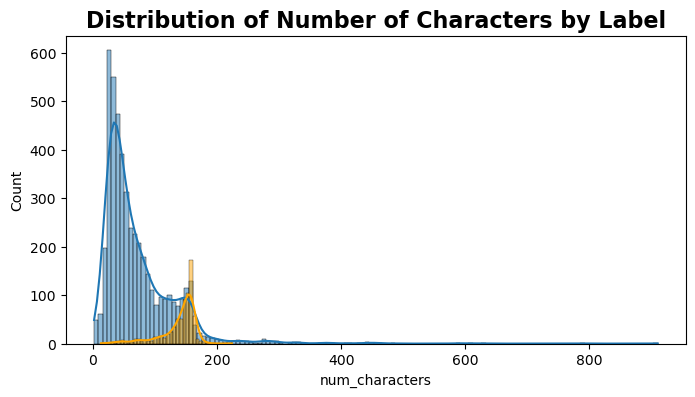

In [18]:
# Create a figure and set the figure size
plt.figure(figsize=(8, 4))

# Plot the histogram for label 0
sns.histplot(df[df['label'] == 0]['num_characters'], label='Label 0', kde=True)

# Plot the histogram for label; 1
sns.histplot(df[df['label'] == 1]['num_characters'], color='orange', label='Label 1', kde=True)

# Add title
plt.title('Distribution of Number of Characters by Label', fontsize=16, fontweight='bold')

Text(0.5, 1.0, 'Distribution of Number of Words by Label')

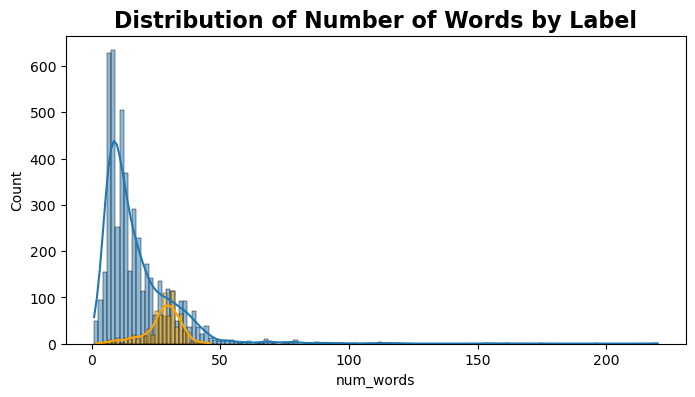

In [19]:
# Create a figure and set the figure size
plt.figure(figsize=(8, 4))

# Plot the histogram for target 0
sns.histplot(df[df['label'] == 0]['num_words'], label='Label 0', kde=True)

# Plot the histogram for target 1
sns.histplot(df[df['label'] == 1]['num_words'], color='orange', label='Label 1', kde=True)

# Add title
plt.title('Distribution of Number of Words by Label', fontsize=16, fontweight='bold')

Text(0.5, 1.0, 'Distribution of Number of Sentences by Label')

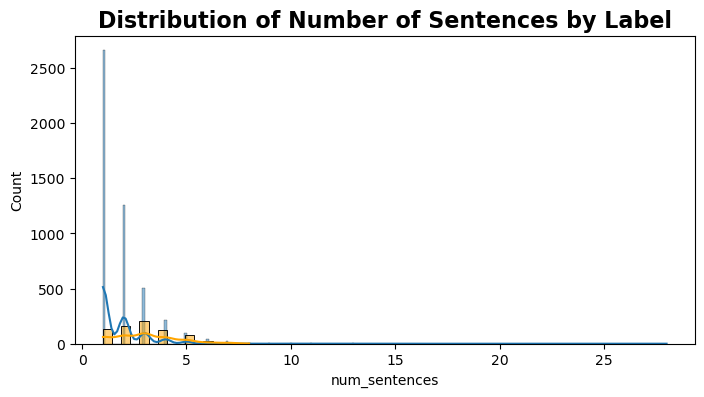

In [20]:
# Create a figure and set the figure size
plt.figure(figsize=(8, 4))

# Plot the histogram for target 0
sns.histplot(df[df['label'] == 0]['num_sentences'], label='Label 0', kde=True)

# Plot the histogram for target 1
sns.histplot(df[df['label'] == 1]['num_sentences'], color='orange', label='Label 1', kde=True)

# Add title
plt.title('Distribution of Number of Sentences by Label', fontsize=16, fontweight='bold')

In [21]:
# correlation matrix
correlation_matrix = df[['label','num_characters', 'num_words', 'num_sentences']].corr()
print(correlation_matrix)

                   label  num_characters  num_words  num_sentences
label           1.000000        0.387285   0.263317       0.290500
num_characters  0.387285        1.000000   0.966325       0.646715
num_words       0.263317        0.966325   1.000000       0.689782
num_sentences   0.290500        0.646715   0.689782       1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

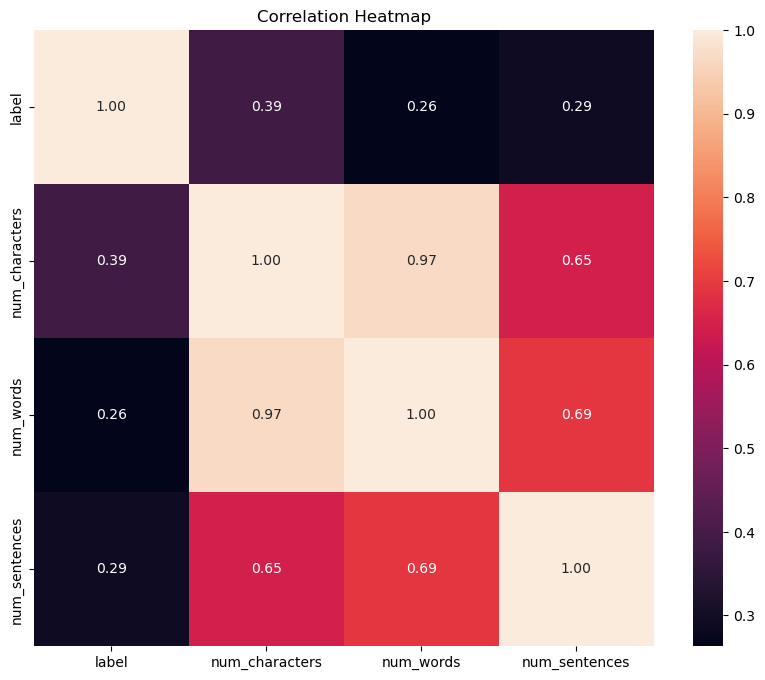

In [22]:
# correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')

# **PRE-PROCESSING**


## **Check Duplicated Values**

In [23]:
df.duplicated().sum()

403

## **Remove duplivate values and keep first value**

In [24]:
df = df.drop_duplicates(keep='first')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           5169 non-null   int32 
 1   text            5169 non-null   object
 2   num_characters  5169 non-null   int64 
 3   num_words       5169 non-null   int64 
 4   num_sentences   5169 non-null   int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 222.1+ KB


## **Tranfer data**


*   Lower case
*   Tokenization using NLTK
*   Removing special characters
*   Removing stopwords and punctuation
*   Word stemming





In [26]:
nltk.download('stopwords')
def transform_text(text):
  # lower case
  text = text.lower()

  # message tokenization
  text = nltk.word_tokenize(text)

  # removing special characters
  rel_text = []
  for word in text:
    if word.isalnum():
      rel_text.append(word)

  # removing stopwords and punctuation
  text = rel_text[:]
  rel_text.clear()
  stop_words = set(stopwords.words('english'))
  for word in text:
    if word not in string.punctuation and word not in stop_words:
      rel_text.append(word)

  # Stemming word
  text = rel_text[:]
  rel_text.clear()
  ps = PorterStemmer()
  for word in text:
    rel_text.append(ps.stem(word))

  return " ".join(rel_text)

[nltk_data] Downloading package stopwords to C:\Users\LAPTOP
[nltk_data]     DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [27]:
df['transformed_text'] = df['text'].apply(transform_text)

In [28]:
df.head()

,label,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## **Create Word Cloud for Spam Messages**

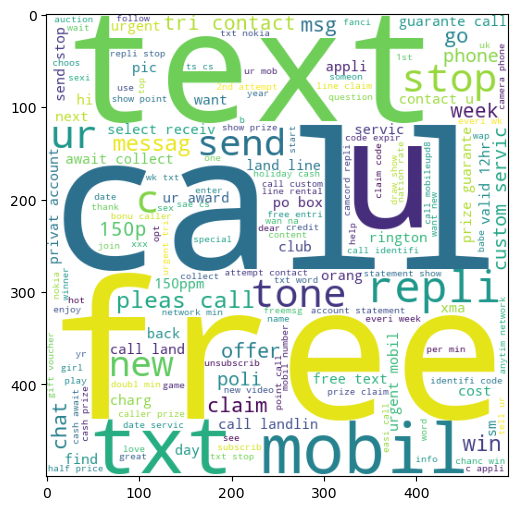

In [29]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

## **Create Word Cloud for Ham messages**

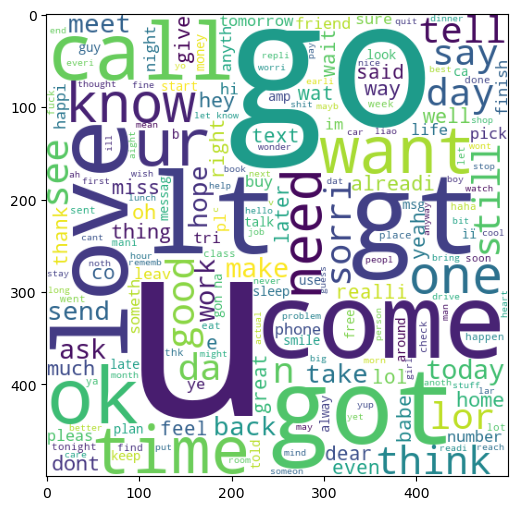

In [30]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

## **Find top 30 words of spam message**

In [31]:
list_word_of_spam_msg = []
list_transformed_spam_texts = df[df['label'] == 1]['transformed_text'].tolist()
for sentence in list_transformed_spam_texts:
  for word in sentence.split():
    list_word_of_spam_msg.append(word)
len(list_word_of_spam_msg)

# List 30 most common words
list_spam_words = Counter(list_word_of_spam_msg).most_common(30)

# data frame for the 30 most common words
spam_word_df = pd.DataFrame(list_spam_words, columns=['word', 'frequency'])

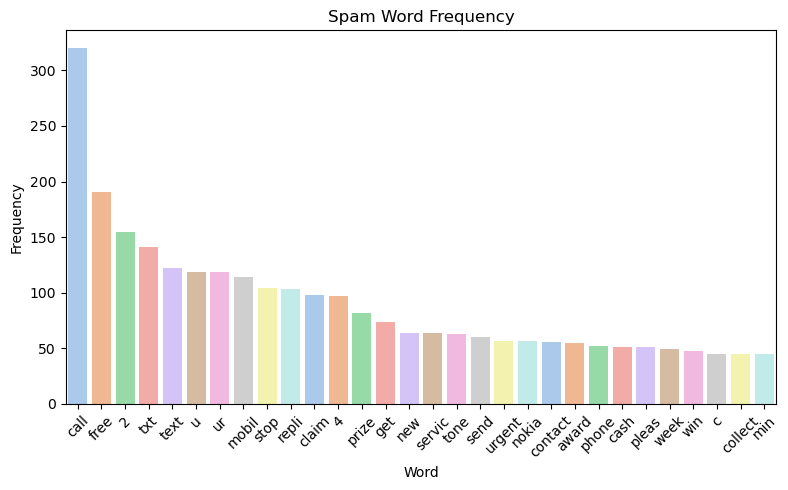

In [32]:
# Bar chart for 30 most common spam words
plt.figure(figsize=(8, 5))
sns.barplot(x='word', y='frequency', data=spam_word_df, palette='pastel')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Spam Word Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Find top 30 words of ham message**

In [33]:
list_word_of_ham_msg = []
list_transformed_ham_texts = df[df['label'] == 0]['transformed_text'].tolist()
for sentence in list_transformed_ham_texts:
  for word in sentence.split():
    list_word_of_ham_msg.append(word)
len(list_word_of_ham_msg)

# List 30 most common words
list_ham_words = Counter(list_word_of_ham_msg).most_common(30)

# data frame for the 30 most common words
ham_word_df = pd.DataFrame(list_ham_words, columns=['word', 'frequency'])

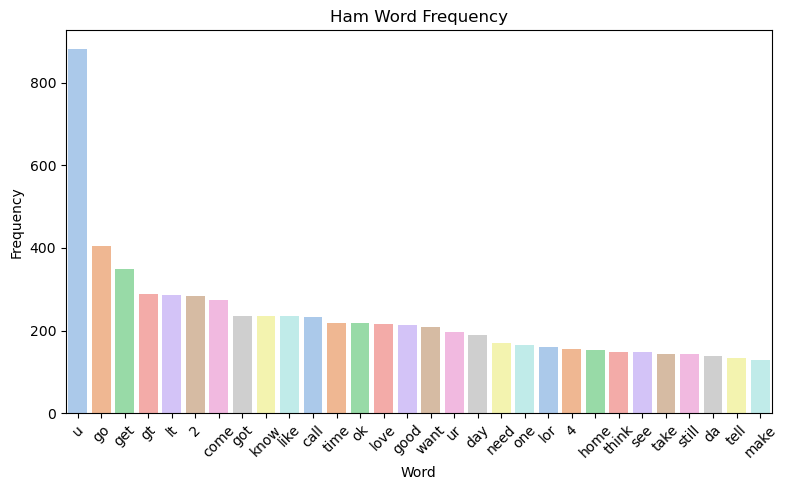

In [34]:
# Bar chart for 30 most common ham words
plt.figure(figsize=(8, 5))
sns.barplot(x='word', y='frequency', data=ham_word_df, palette='pastel')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Ham Word Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **MODEL BUILDING**


## **Split into Train and Test Data**

In [35]:
vectorizer = TfidfVectorizer(max_features = 3000)

vectors = vectorizer.fit_transform(df['transformed_text'])
vectors.shape

X = vectors
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


## **Define the train model function**

In [36]:

def train_classifier(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)

    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    test_conf_mat = confusion_matrix(y_test, y_test_pred)

    return (round(train_precision, 6), round(train_recall, 6), round(train_f1, 6), round(train_accuracy, 6)), \
           (round(test_precision, 6), round(test_recall, 6), round(test_f1, 6), round(test_accuracy, 6)), \
           test_conf_mat

## Finding K for KNN model

In [37]:
knn_classifiers = []

for k in range(1, 22, 2):

    knn = KNeighborsClassifier(n_neighbors=k)


    knn_classifiers.append(knn)

model_evaluation = pd.DataFrame(columns=['K','Train Precision', 'Train Recall', 'Test Precision', 'Test Recall'])

for index, knn_classifier in enumerate(knn_classifiers):
    train_score, test_score, test_conf_mat = train_classifier(knn_classifier, X_train, y_train, X_test, y_test)
    (train_precision, train_recall, train_f1, train_accuracy) = train_score
    (test_precision, test_recall, test_f1, test_accuracy) = test_score

    k = 2 * index + 1

    new_row_data = {'K' : k, 'Train Precision': train_precision, 'Train Recall': train_recall, 'Test Precision': test_precision, 'Test Recall': test_recall}
    # new_row_data = [int(k), train_precision, train_recall, test_precision, test_recall]
    model_evaluation.loc[index + 1] = new_row_data

model_evaluation


,K,Train Precision,Train Recall,Test Precision,Test Recall
1,1,1.000000,0.996063,1.0,0.600000
2,3,0.996622,0.580709,1.0,0.434483
3,5,1.000000,0.385827,1.0,0.317241
4,7,0.993865,0.318898,1.0,0.262069
5,9,1.000000,0.251969,1.0,0.206897
6,11,1.000000,0.190945,1.0,0.165517
7,13,1.000000,0.137795,1.0,0.131034
8,15,1.000000,0.112205,1.0,0.110345
9,17,1.000000,0.080709,1.0,0.068966
10,19,1.000000,0.051181,1.0,0.055172


## **Initialize the Models**

In [38]:
# Decision Tree
dt_clf = DecisionTreeClassifier(max_depth = 5)

# random forest
rf_clf = RandomForestClassifier(n_estimators = 50, random_state = 2 )

# Naive Bayes
mnb = MultinomialNB()

# K-nearest Neighbors
k = 1
knn_clf = KNeighborsClassifier(n_neighbors=k)


# Support Vector Machine
svc = SVC(kernel= "sigmoid", gamma  = 1.0)

## **Dictionary of the Models**

In [39]:
classifiers = {
    'DecisionTree' : dt_clf,
    'RandomForest' : rf_clf,
    'NaiveBayes' : mnb,
    'KNN' : knn_clf,
    'Support Vector Machine' : svc
}

##  **Evaluate the Models and plot confusion matrix heatmap**

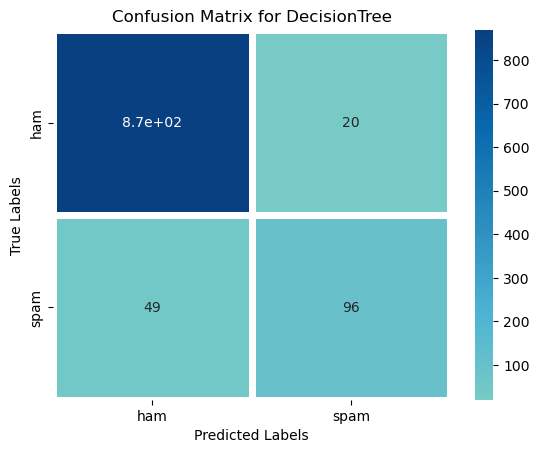

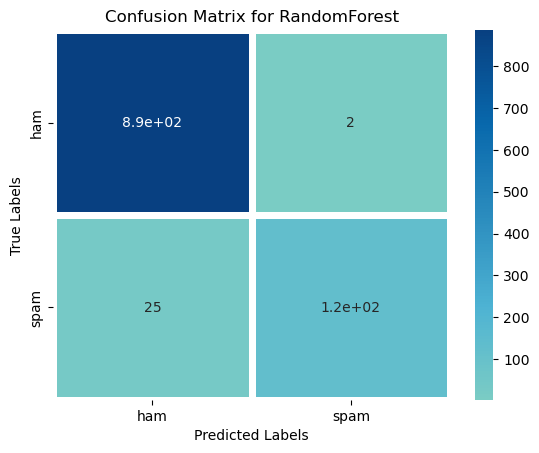

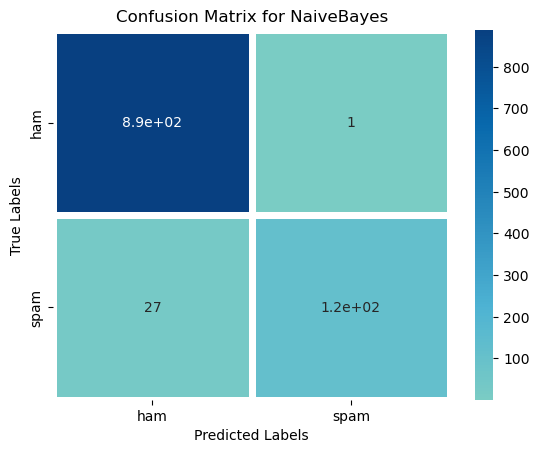

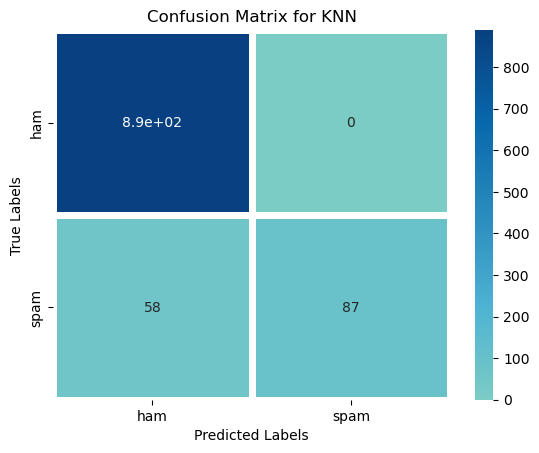

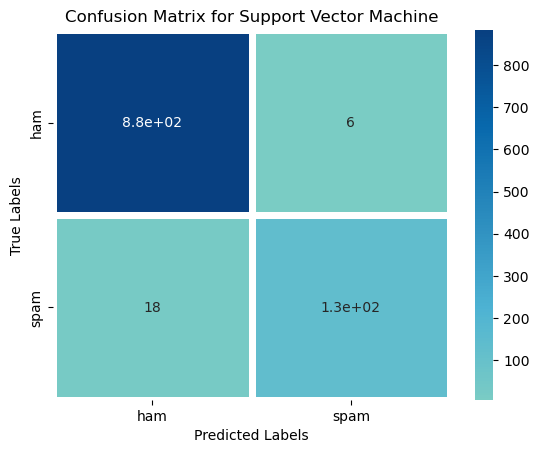

,Precision,Recall,F1Score,Accuracy on Testset,Accuracy on Trainset
DecisionTree,0.827586,0.662069,0.735632,0.933269,0.951874
RandomForest,0.983607,0.827586,0.898876,0.973888,0.999274
NaiveBayes,0.991597,0.813793,0.893939,0.972921,0.979686
KNN,1.000000,0.600000,0.750000,0.943907,0.999516
Support Vector Machine,0.954887,0.875862,0.913669,0.976789,0.983797


In [40]:
def plot_conf_heatmap(conf_mat, classifier_name):
    ax = plt.subplot()
    sns.heatmap(conf_mat, annot=True, ax=ax, linewidths=5, cmap="GnBu", center=0)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title("Confusion Matrix for {}".format(classifier_name))
    ax.xaxis.set_ticklabels(['ham','spam'])
    ax.yaxis.set_ticklabels(['ham','spam'])
    plt.show()

model_evaluation = pd.DataFrame(columns=['Precision', 'Recall', 'F1Score', 'Accuracy on Testset', 'Accuracy on Trainset'])

for name, classifier in classifiers.items():
    train_score, test_score, test_conf_mat = train_classifier(classifier, X_train, y_train, X_test, y_test)
    (train_precision, train_recall, train_f1, train_accuracy) = train_score
    (test_precision, test_recall, test_f1, test_accuracy) = test_score

    new_row_data = {'Precision': test_precision, 'Recall': test_recall, 'F1Score': test_f1, 'Accuracy on Testset': test_accuracy, 'Accuracy on Trainset': train_accuracy}

    # Add new row to df
    model_evaluation.loc[name] = new_row_data
    plot_conf_heatmap(test_conf_mat, name)

    # Show DataFrame model_evaluation
model_evaluation


In [41]:
import pickle
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))
pickle.dump(rf_clf,open('model.pkl','wb'))

In [44]:
# Save vectorizer
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))

# Save model
pickle.dump(rf_clf, open('model.pkl', 'wb'))